# IFEST UNPAD - Data Analysis Competition
Anggota Tim : 
- Jeremy
- Gerend Christopher
- Jevan Christopher
- Felix Fernando

Kamus Data

1. Nama : Nama Siswa/Mahasiswa
2. Gender : Jenis Kelamin
3. Bahasa, Inggris, TIK, Matematika, Fisika, Biologi, Geografi, Sosiologi, Antropologi :  Rata-Rata Nilai ketika sekolah
4. Extra_Kurikuler : Ekskul yang diikuti ketika sekolah
5. Tinggal_Dengen : Tempat Siswa/Mahasiswa tinggal
6. Status_Kerja : Apakah siswa/mahasiswa bekerja atau tidak
7. Biaya : Biaya kuliah
8. Tgl_Daftar_Kuliah : Tahun daftar kuliah
9. Alamat : Alamat siswa/mahasiswa
10. UKM : Jenis UKM yang diikuti ketika kuliah
11. Organisasi_Kampus : Apakah mahasiswa mengikuti organisasi kampus
12. Lama_Kuliah : Lama mahasiswa menyelesaikan kuliah (dalam tahun)


NA: Tidak ada data

## Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

## Initial Setup

Reading CSV

In [2]:
df = pd.read_csv('Data - Kualifikasi.csv', sep=';')

In [3]:
df.head()

,Nama,Gender,Tinggal_Dengan,Status_Kerja,Biaya,Tgl_Daftar_Kuliah,Alamat,UKM,Organisasi_Kampus,Lama_Kuliah,Fakultas
0,Abbey Butler,Pria,Kos,Belum,Beasiswa,2008,Tangerang,UKM_3,Ya,"3,5",DKV
1,Abbey Carpenter,Wanita,NaN,Belum,NaN,2009,Bekasi,UKM_2,Tidak,4,FIKOM
2,Abbey Dubois,Wanita,NaN,Bekerja,Beasiswa,2008,Serang,UKM_4,Tidak,"4,5",FIKOM
3,Abbey Gosling,Wanita,Orang Tua,Belum,Beasiswa,2009,Serang,UKM_1,Tidak,"5,5",DKV
4,Abbey Logan,Wanita,Orang Tua,Bekerja,NaN,2009,Bekasi,Tidak,Ya,"6,5",DKV


## Data Cleansing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11499 entries, 0 to 11498
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Nama               11499 non-null  object
 1   Gender             11499 non-null  object
 2   Tinggal_Dengan     7517 non-null   object
 3   Status_Kerja       11499 non-null  object
 4   Biaya              7720 non-null   object
 5   Tgl_Daftar_Kuliah  11499 non-null  int64 
 6   Alamat             11499 non-null  object
 7   UKM                11499 non-null  object
 8   Organisasi_Kampus  11499 non-null  object
 9   Lama_Kuliah        11499 non-null  object
 10  Fakultas           11499 non-null  object
dtypes: int64(1), object(10)
memory usage: 988.3+ KB


Null data plot

In [5]:
df.isna().sum()

Nama                    0
Gender                  0
Tinggal_Dengan       3982
Status_Kerja            0
Biaya                3779
Tgl_Daftar_Kuliah       0
Alamat                  0
UKM                     0
Organisasi_Kampus       0
Lama_Kuliah             0
Fakultas                0
dtype: int64

<AxesSubplot:>

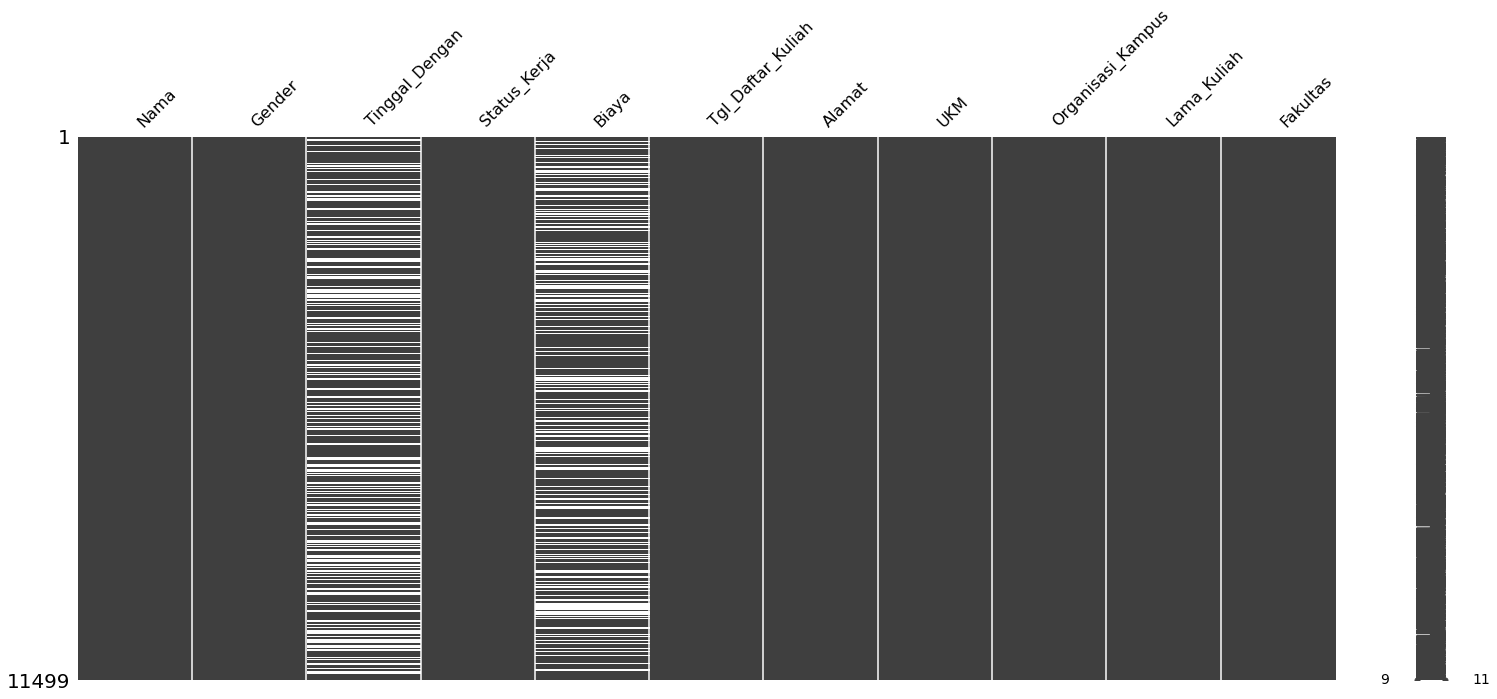

In [6]:
msno.matrix(df)

### Checking unique data of each label

In [7]:
for label in df:
    print(label + ':')
    print(df[label].unique())
    print()

Nama:
['Abbey Butler' 'Abbey Carpenter' 'Abbey Dubois' ... 'Zoe Ogilvy'
 'Zoe Thompson' 'Zoe Varndell']

Gender:
['Pria' 'Wanita']

Tinggal_Dengan:
['Kos' nan 'Orang Tua']

Status_Kerja:
['Belum' 'Bekerja']

Biaya:
['Beasiswa' nan 'Orang Tua']

Tgl_Daftar_Kuliah:
[2008 2009 2007]

Alamat:
['Tangerang' 'Bekasi' 'Serang' 'Bogor' 'Jakarta' 'Karawang']

UKM:
['UKM_3' 'UKM_2' 'UKM_4' 'UKM_1' 'Tidak']

Organisasi_Kampus:
['Ya' 'Tidak']

Lama_Kuliah:
['3,5' '4' '4,5' '5,5' '6,5' '5' '6' '7']

Fakultas:
['DKV' 'FIKOM' 'FISIP' 'FTI' 'FT']



### Handling null data

Asumsi : 
- Data 'Tinggal_Dengan' yang null, artinya mahasiswa tinggal 'sendiri'
- Data 'Biaya' yang null, artinya mahasiswa menggunakan biayanya secara 'mandiri'

In [8]:
df['Tinggal_Dengan'] = df['Tinggal_Dengan'].fillna('Sendiri')
df['Biaya'] = df['Biaya'].fillna('Mandiri')

In [9]:
df.isnull().any()

Nama                 False
Gender               False
Tinggal_Dengan       False
Status_Kerja         False
Biaya                False
Tgl_Daftar_Kuliah    False
Alamat               False
UKM                  False
Organisasi_Kampus    False
Lama_Kuliah          False
Fakultas             False
dtype: bool

Setting data type for specific label

In [10]:
for i in range(len(df)):
    df.at[i, 'Lama_Kuliah'] = float(df.at[i, 'Lama_Kuliah'].replace(',', '.')) # Setting to integer
    if df.at[i, 'Status_Kerja'] == 'Belum': 
        df.at[i, 'Status_Kerja'] = False
    elif df.at[i, 'Status_Kerja'] == 'Bekerja': 
        df.at[i, 'Status_Kerja'] = True
    if df.at[i, 'Organisasi_Kampus'] == 'Ya': 
        df.at[i, 'Organisasi_Kampus'] = True
    elif df.at[i, 'Organisasi_Kampus'] == 'Tidak': 
        df.at[i, 'Organisasi_Kampus'] = False        

df['Jenis_Kelulusan'] = ['Cepat' if df.loc[i, 'Lama_Kuliah'] == 3.5 else 'Tepat Waktu' if df.loc[i, 'Lama_Kuliah'] ==  4 else 'Telat' for i in range(len(df['Lama_Kuliah']))]
df["UKM"] = df["UKM"].replace({
    "UKM_1" : "Olahraga", 
    "UKM_2" : "Seni", 
    "UKM_3" : 'Kewirausahaan',
    "UKM_4" : 'Keilmuan'
    }
)

In [11]:
df.head()

,Nama,Gender,Tinggal_Dengan,Status_Kerja,Biaya,Tgl_Daftar_Kuliah,Alamat,UKM,Organisasi_Kampus,Lama_Kuliah,Fakultas,Jenis_Kelulusan
0,Abbey Butler,Pria,Kos,False,Beasiswa,2008,Tangerang,Kewirausahaan,True,3.5,DKV,Cepat
1,Abbey Carpenter,Wanita,Sendiri,False,Mandiri,2009,Bekasi,Seni,False,4,FIKOM,Tepat Waktu
2,Abbey Dubois,Wanita,Sendiri,True,Beasiswa,2008,Serang,Keilmuan,False,4.5,FIKOM,Telat
3,Abbey Gosling,Wanita,Orang Tua,False,Beasiswa,2009,Serang,Olahraga,False,5.5,DKV,Telat
4,Abbey Logan,Wanita,Orang Tua,True,Mandiri,2009,Bekasi,Tidak,True,6.5,DKV,Telat


In [12]:
for label in df:
    print(label + ':')
    print(df[label].unique())
    print()

Nama:
['Abbey Butler' 'Abbey Carpenter' 'Abbey Dubois' ... 'Zoe Ogilvy'
 'Zoe Thompson' 'Zoe Varndell']

Gender:
['Pria' 'Wanita']

Tinggal_Dengan:
['Kos' 'Sendiri' 'Orang Tua']

Status_Kerja:
[False True]

Biaya:
['Beasiswa' 'Mandiri' 'Orang Tua']

Tgl_Daftar_Kuliah:
[2008 2009 2007]

Alamat:
['Tangerang' 'Bekasi' 'Serang' 'Bogor' 'Jakarta' 'Karawang']

UKM:
['Kewirausahaan' 'Seni' 'Keilmuan' 'Olahraga' 'Tidak']

Organisasi_Kampus:
[True False]

Lama_Kuliah:
[3.5 4.0 4.5 5.5 6.5 5.0 6.0 7.0]

Fakultas:
['DKV' 'FIKOM' 'FISIP' 'FTI' 'FT']

Jenis_Kelulusan:
['Cepat' 'Tepat Waktu' 'Telat']



## Changing Data Types

In [13]:
df = df.astype({'Status_Kerja': 'bool', 'Organisasi_Kampus': 'bool', 'Lama_Kuliah': 'float64'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11499 entries, 0 to 11498
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Nama               11499 non-null  object 
 1   Gender             11499 non-null  object 
 2   Tinggal_Dengan     11499 non-null  object 
 3   Status_Kerja       11499 non-null  bool   
 4   Biaya              11499 non-null  object 
 5   Tgl_Daftar_Kuliah  11499 non-null  int64  
 6   Alamat             11499 non-null  object 
 7   UKM                11499 non-null  object 
 8   Organisasi_Kampus  11499 non-null  bool   
 9   Lama_Kuliah        11499 non-null  float64
 10  Fakultas           11499 non-null  object 
 11  Jenis_Kelulusan    11499 non-null  object 
dtypes: bool(2), float64(1), int64(1), object(8)
memory usage: 920.9+ KB


## EDA

Statistika Deskriptif

In [14]:
df.describe()

,Tgl_Daftar_Kuliah,Lama_Kuliah
count,11499.000000,11499.000000
mean,2007.996348,5.245804
std,0.816630,1.143226
min,2007.000000,3.500000
25%,2007.000000,4.500000
50%,2008.000000,5.000000
75%,2009.000000,6.000000
max,2009.000000,7.000000


Count lama kuliah untuk masing-masing gender 

<AxesSubplot:xlabel='Lama_Kuliah', ylabel='count'>

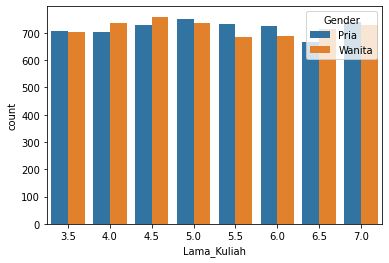

In [15]:
sns.countplot(data=df, x='Lama_Kuliah', hue='Gender')

Count plot setiap kolom

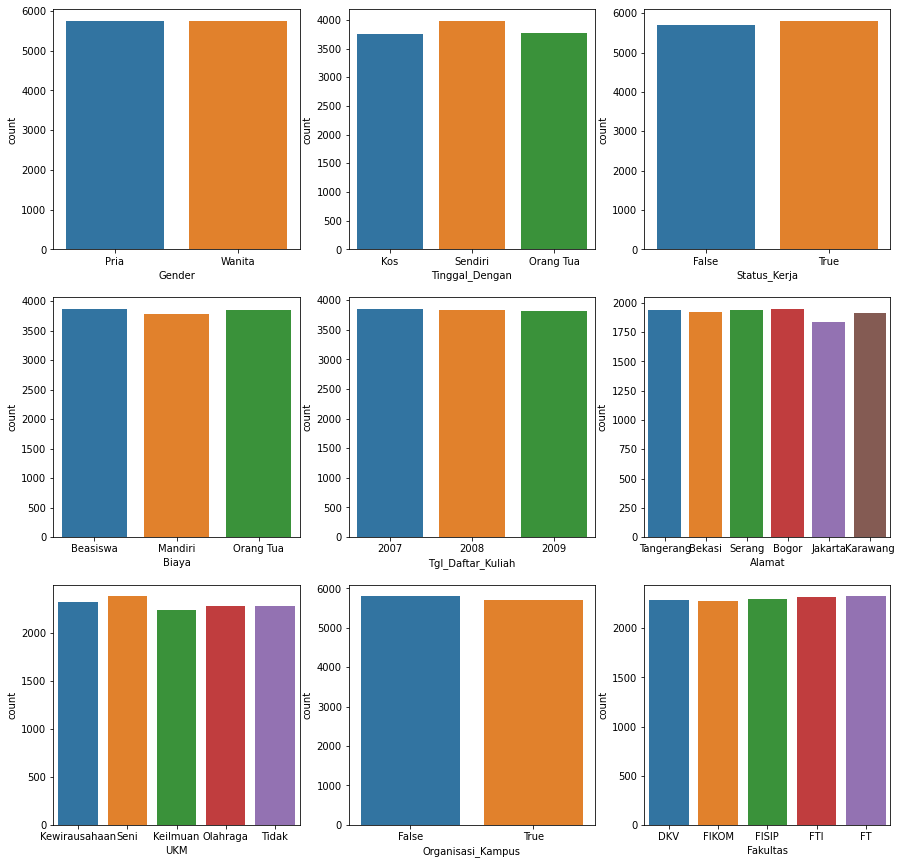

In [16]:
cols = ['Gender', 'Tinggal_Dengan', 'Status_Kerja', 'Biaya', 'Tgl_Daftar_Kuliah', 
        'Alamat', 'UKM', 'Organisasi_Kampus', 'Fakultas']

plt.figure(figsize=(15,15))
for i, col  in enumerate(cols):
    plt.subplot(3,3,i+1)
    sns.countplot(data=df, x=col)

Countplot lama kuliah terkait dengan kolom

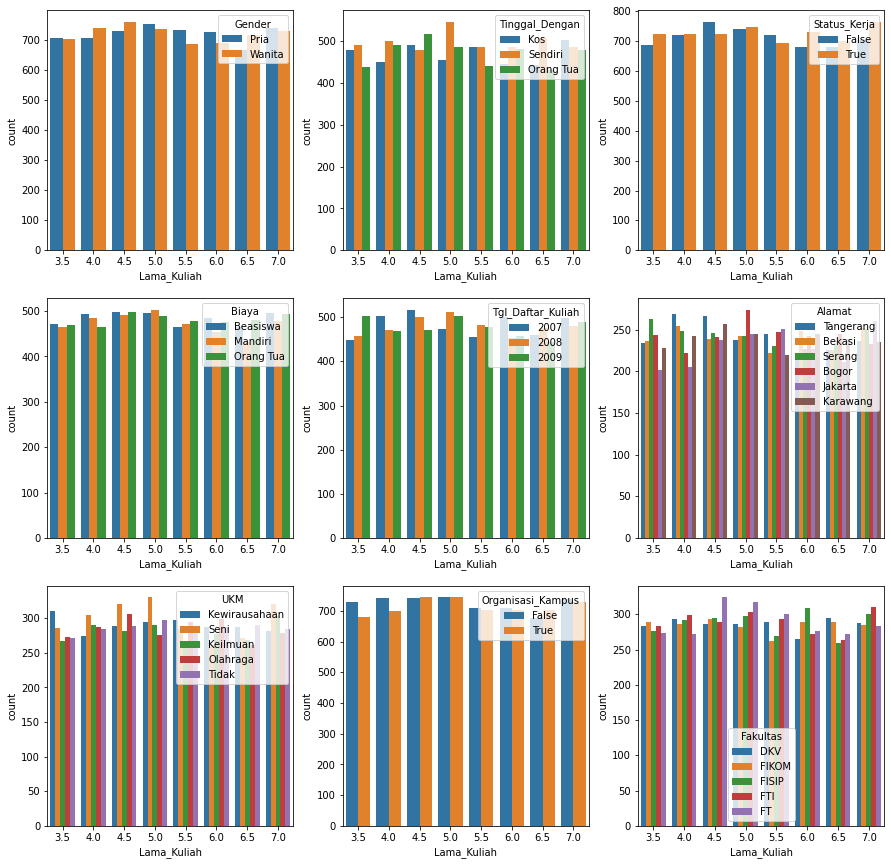

In [147]:
cols = ['Gender', 'Tinggal_Dengan', 'Status_Kerja', 'Biaya', 'Tgl_Daftar_Kuliah', 
        'Alamat', 'UKM', 'Organisasi_Kampus', 'Fakultas']

plt.figure(figsize=(15,15))
for i, col  in enumerate(cols):
    plt.subplot(3,3,i+1)
    sns.countplot(data=df, x='Lama_Kuliah', hue=col)

Countplot lulus tepat waktu dan tidak tepat waktu

<AxesSubplot:xlabel='Jenis_Kelulusan', ylabel='count'>

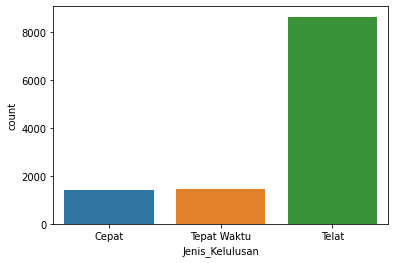

In [148]:
sns.countplot(data=df, x='Jenis_Kelulusan')

## Data Preparation

### One-Hot Encoding

Gender

In [18]:
gender = pd.get_dummies(df.Gender, prefix='Gender')
biaya = pd.get_dummies(df.Biaya, prefix='Biaya')
ukm = pd.get_dummies(df.UKM, prefix='UKM')
fak = pd.get_dummies(df.Fakultas, prefix='Fakultas')
alamat = pd.get_dummies(df.Alamat, prefix='Alamat')
tinggal_dengan = pd.get_dummies(df.Tinggal_Dengan, prefix='Tinggal')
kerja = pd.get_dummies(df.Status_Kerja, prefix='Kerja')
org = pd.get_dummies(df.Organisasi_Kampus, prefix='Organisasi')

Combining Row

In [19]:
encoding = pd.concat([gender, ukm, fak, alamat, tinggal_dengan, kerja, org], axis=1, join='inner')

encoding.head()

,Gender_Pria,Gender_Wanita,UKM_Keilmuan,UKM_Kewirausahaan,UKM_Olahraga,UKM_Seni,UKM_Tidak,Fakultas_DKV,Fakultas_FIKOM,Fakultas_FISIP,...,Alamat_Karawang,Alamat_Serang,Alamat_Tangerang,Tinggal_Kos,Tinggal_Orang Tua,Tinggal_Sendiri,Kerja_False,Kerja_True,Organisasi_False,Organisasi_True
0,1,0,0,1,0,0,0,1,0,0,...,0,0,1,1,0,0,1,0,0,1
1,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,1,0,1,0
2,0,1,1,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,1,1,0
3,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,1,0,1,0,1,0
4,0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,1,0,1


## Classification

In [20]:
df.head()

,Nama,Gender,Tinggal_Dengan,Status_Kerja,Biaya,Tgl_Daftar_Kuliah,Alamat,UKM,Organisasi_Kampus,Lama_Kuliah,Fakultas,Jenis_Kelulusan
0,Abbey Butler,Pria,Kos,False,Beasiswa,2008,Tangerang,Kewirausahaan,True,3.5,DKV,Cepat
1,Abbey Carpenter,Wanita,Sendiri,False,Mandiri,2009,Bekasi,Seni,False,4.0,FIKOM,Tepat Waktu
2,Abbey Dubois,Wanita,Sendiri,True,Beasiswa,2008,Serang,Keilmuan,False,4.5,FIKOM,Telat
3,Abbey Gosling,Wanita,Orang Tua,False,Beasiswa,2009,Serang,Olahraga,False,5.5,DKV,Telat
4,Abbey Logan,Wanita,Orang Tua,True,Mandiri,2009,Bekasi,Tidak,True,6.5,DKV,Telat


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel

In [22]:
col = encoding.columns
X = encoding
y = df["Jenis_Kelulusan"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [183]:
# spot-check algorithm
models = [('CART', DecisionTreeClassifier()),
        ('RF', RandomForestClassifier()),
        ('KNN', KNeighborsClassifier())]

models_name = []
results = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_score = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    models_name.append(name)
    results.append(cv_score)
    print(f'{name} \t | cv_score_mean: {cv_score.mean()} \t | cv_score_std: {cv_score.std()}')

CART 	 | cv_score_mean: 0.6083998008098854 	 | cv_score_std: 0.008483662205992266
RF 	 | cv_score_mean: 0.6633138132168045 	 | cv_score_std: 0.008052929182907214


c:\Users\acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and

KNN 	 | cv_score_mean: 0.6959874000671687 	 | cv_score_std: 0.0019368548872238489


c:\Users\acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Decision Tree

In [184]:
# check maximum depth of the tree
acc_score = []

def checkMaxDepth(X, y):
    depth = np.arange(2, 21, 1)

    for i in depth:
        cart = DecisionTreeClassifier(max_depth=i)
        cart.fit(X_train, y_train)
        pred = cart.predict(X_test)
        accuracy = accuracy_score(y_test, pred)
        acc_score.append(accuracy)
        print(f'max_depth: {i} \t | accuracy score: {accuracy}')

checkMaxDepth(X=X_train, y=y_train)
print("Depth with highest accuracy score :", acc_score.index(max(acc_score))+2)

max_depth: 2 	 | accuracy score: 0.7652173913043478
max_depth: 3 	 | accuracy score: 0.7652173913043478
max_depth: 4 	 | accuracy score: 0.7652173913043478
max_depth: 5 	 | accuracy score: 0.7652173913043478
max_depth: 6 	 | accuracy score: 0.7655072463768116
max_depth: 7 	 | accuracy score: 0.7617391304347826
max_depth: 8 	 | accuracy score: 0.7556521739130435
max_depth: 9 	 | accuracy score: 0.7478260869565218
max_depth: 10 	 | accuracy score: 0.7365217391304347
max_depth: 11 	 | accuracy score: 0.7142028985507246
max_depth: 12 	 | accuracy score: 0.6904347826086956
max_depth: 13 	 | accuracy score: 0.6753623188405797
max_depth: 14 	 | accuracy score: 0.6620289855072464
max_depth: 15 	 | accuracy score: 0.652463768115942
max_depth: 16 	 | accuracy score: 0.6443478260869565
max_depth: 17 	 | accuracy score: 0.6394202898550725
max_depth: 18 	 | accuracy score: 0.6371014492753623
max_depth: 19 	 | accuracy score: 0.6385507246376811
max_depth: 20 	 | accuracy score: 0.6391304347826087
De

Random Tree Regressor

In [26]:
from sklearn.inspection import permutation_importance

col = encoding.columns
X = encoding
y = df["Lama_Kuliah"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = RandomForestRegressor(max_depth=6, random_state=1)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
r = permutation_importance(clf, X_test, y_test, n_repeats=30, random_state=1)



In [27]:
display(r['importances_mean'])

feature = pd.DataFrame()
for i, val in enumerate(r['importances_mean']): 
    feature.at[i, 'feature'] = X.columns[i]
    feature.at[i, 'weight'] = val

array([-4.74087747e-04, -1.13265653e-04, -1.52852111e-04, -8.30105738e-04,
        6.09333108e-04, -7.04570983e-04,  2.56860825e-04, -6.08383593e-04,
       -8.90393346e-04, -2.00297721e-04,  1.08301155e-03, -3.36936566e-04,
       -3.96848742e-04,  4.03541290e-04,  5.22857859e-04, -2.95439130e-04,
       -4.77526928e-04,  2.08420113e-04,  5.36299721e-04,  4.48156064e-06,
       -5.26302753e-04,  6.03724684e-04,  8.95094574e-04, -5.61844622e-04,
       -6.78294547e-04])

In [31]:
feature.sort_values(by='weight', ascending=False)

,feature,weight
10,Fakultas_FT,0.001083
22,Kerja_True,0.000895
4,UKM_Olahraga,0.000609
21,Kerja_False,0.000604
18,Tinggal_Kos,0.000536
14,Alamat_Jakarta,0.000523
13,Alamat_Bogor,0.000404
6,UKM_Tidak,0.000257
17,Alamat_Tangerang,0.000208
19,Tinggal_Orang Tua,0.000004


Decision Tree Regressor

In [216]:
from sklearn.inspection import permutation_importance

col = encoding.columns
X = encoding
y = df["Lama_Kuliah"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeRegressor(max_depth=6)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
r = permutation_importance(clf, X_test, y_test, n_repeats=30, random_state=0)



In [217]:
feature.sort_values(by='weight', ascending=False)

,feature,weight
10,Fakultas_FT,0.001146
21,Kerja_False,0.000793
22,Kerja_True,0.000540
4,UKM_Olahraga,0.000504
13,Alamat_Bogor,0.000457
19,Tinggal_Orang Tua,0.000436
17,Alamat_Tangerang,0.000430
11,Fakultas_FTI,0.000389
2,UKM_Keilmuan,0.000230
15,Alamat_Karawang,0.000222


Random Forest

In [158]:
# check maximum depth of the tree
acc_score = []

def checkMaxDepth(X, y):
    depth = np.arange(2, 21, 1)
    forest = np.arange(10, 500, 25)
    for i in depth:
        for j in forest:
            cart = RandomForestClassifier(max_depth=i, n_estimators=j)
            cart.fit(X_train, y_train)
            pred = cart.predict(X_test)
            accuracy = accuracy_score(y_test, pred)
            acc_score.append(accuracy)
            print(f'max_depth: {i} max_depth: {j} \t | accuracy score: {accuracy}')

checkMaxDepth(X=X_train, y=y_train)
print("Depth with highest accuracy score :", acc_score.index(max(acc_score))+2)

max_depth: 2 max_depth: 10 	 | accuracy score: 0.7652173913043478
max_depth: 2 max_depth: 35 	 | accuracy score: 0.7652173913043478
max_depth: 2 max_depth: 60 	 | accuracy score: 0.7652173913043478
max_depth: 2 max_depth: 85 	 | accuracy score: 0.7652173913043478
max_depth: 2 max_depth: 110 	 | accuracy score: 0.7652173913043478
max_depth: 2 max_depth: 135 	 | accuracy score: 0.7652173913043478
max_depth: 2 max_depth: 160 	 | accuracy score: 0.7652173913043478
max_depth: 2 max_depth: 185 	 | accuracy score: 0.7652173913043478
max_depth: 2 max_depth: 210 	 | accuracy score: 0.7652173913043478
max_depth: 2 max_depth: 235 	 | accuracy score: 0.7652173913043478
max_depth: 2 max_depth: 260 	 | accuracy score: 0.7652173913043478
max_depth: 2 max_depth: 285 	 | accuracy score: 0.7652173913043478
max_depth: 2 max_depth: 310 	 | accuracy score: 0.7652173913043478
max_depth: 2 max_depth: 335 	 | accuracy score: 0.7652173913043478
max_depth: 2 max_depth: 360 	 | accuracy score: 0.7652173913043478

KeyboardInterrupt: 

In [191]:
# Create Decision Tree classifer object
clf = RandomForestClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

feature = pd.DataFrame()
for i, val in enumerate(clf.feature_importances_): 
    feature.at[i, 'feature'] = X.columns[i]
    feature.at[i, 'weight'] = val

Accuracy: 0.6730434782608695


In [192]:
feature.sort_values(by='weight', ascending=False)

,feature,weight
20,Tinggal_Sendiri,0.047679
0,Gender_Pria,0.045389
19,Tinggal_Orang Tua,0.044846
5,UKM_Seni,0.044429
1,Gender_Wanita,0.043516
8,Fakultas_FIKOM,0.043250
18,Tinggal_Kos,0.042676
7,Fakultas_DKV,0.042632
4,UKM_Olahraga,0.042013
11,Fakultas_FTI,0.041892


K Nearest Neighbours

In [119]:
# Create Decision Tree classifer object
clf = KNeighborsClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


c:\Users\acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
